# Аналитика в авиакомпании 

Выполним сделающие шаги выполняемого проекта:
1. импортируем файлы и изучим их;
2. проверим данные;
3. выберим топ-10 гороодов по количеству рейсов;
4. построими графики и сделаем выводы: 
    - модели самолетов и количество рейсов;
    - города и количество рейсов;
    - топ-10 городов и количество рейсов.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from functools import reduce
from scipy import stats as st

### Импортируем и изучим файлы

In [19]:
model = pd.read_csv('/datasets/query_1.csv')
model.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [4]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [7]:
city = pd.read_csv('/datasets/query_3.csv')
city.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [9]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Входящие данные говорят о следующем:
1. В таблице model представлено 8 моделей самолетов с количеством полетов каждого. В таблице отсутствуют пропуски и некорректные типы данных;
2. В таблице city 101 город, для каждого определено среднее количество полетов в день. Типы данных соответствуют содержанию столбцов.

### Проверим данные

In [20]:
model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [6]:
model.describe().T

,count,mean,std,min,25%,50%,75%,max
flights_amount,8.0,2035.625,1965.203947,300.0,605.25,795.0,4250.25,4557.0


Данные в таблицы корректные и не требуют изменений

In [21]:
 city.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [12]:
city.describe(percentiles=[.25, .5, .75, .9, .99]).T

,count,mean,std,min,25%,50%,75%,90%,99%,max
average_flights,101.0,5.494189,13.11979,1.0,2.0,3.0,5.870968,9.0,31.16129,129.774194


In [ ]:
Данные в таблице в корректном формате, в половине городов из таблицы количество полетов до 3 в день. При этом, есть город с 129 полетами, что сильно отличается от остальных данных

### Выберим топ-10 городов по количеству рейсов

In [24]:
city_10 = city.sort_values('average_flights', ascending=False).head(10)
city_10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


С большим отрывом лидирует Москва, следом идут Санкт-Петербург и Новосибирск. Далее данные распределены равномерно.

### Построим графики и сделаем выводы

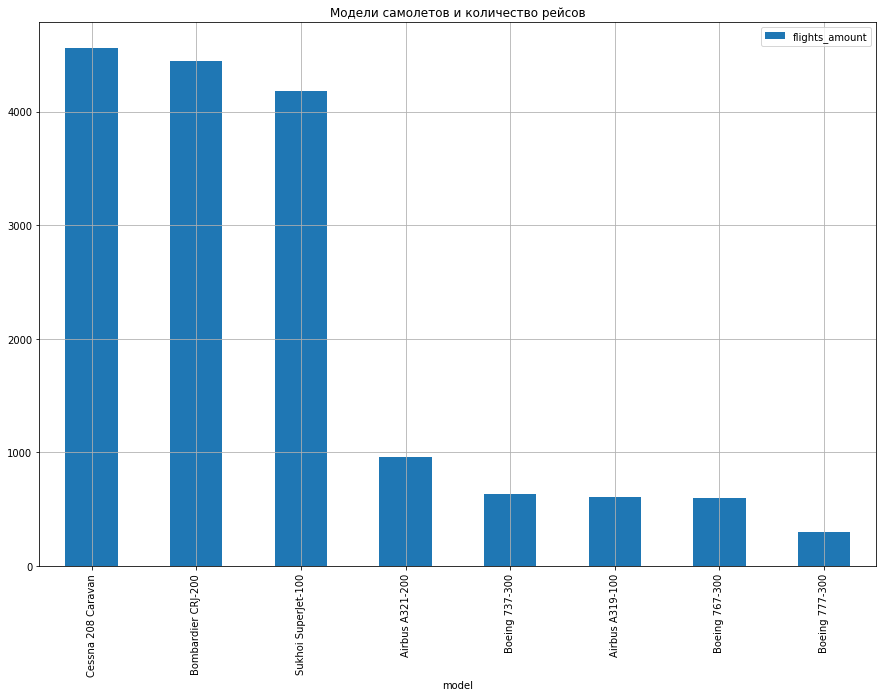

In [41]:
model.sort_values('flights_amount', ascending=False).set_index('model').plot(
    kind='bar', grid=True, figsize=(15, 10), title='Модели самолетов и количество рейсов')

Каак видно из графика, с большим отрывом выделяются три модели самолетов Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100, что говорит о высокой потребности в самолетах этих моделей

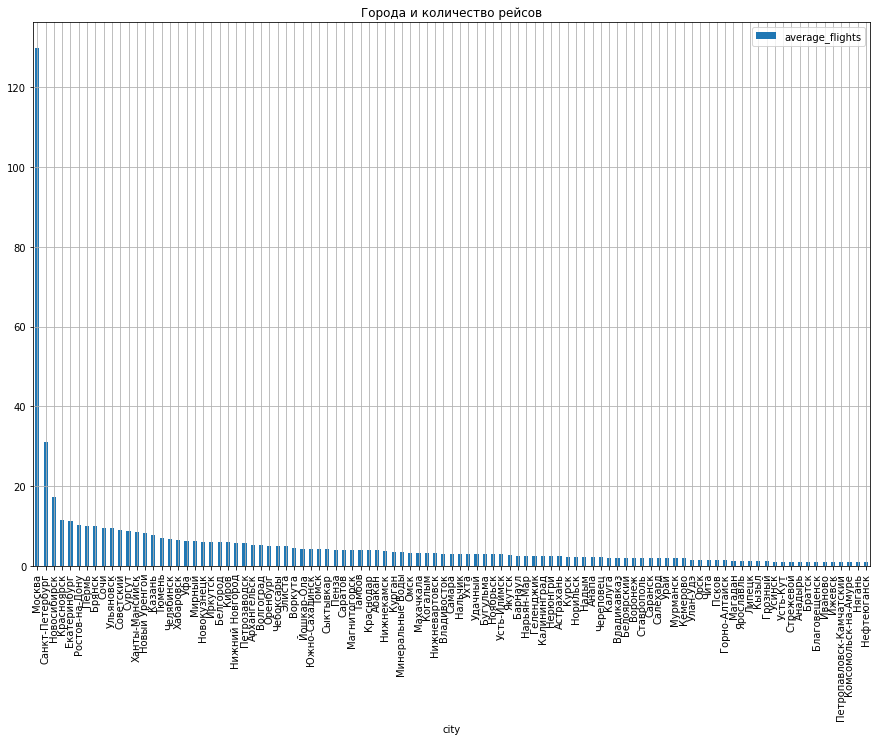

In [43]:
city.sort_values('average_flights', ascending=False).set_index('city').plot(
    kind='bar', grid=True, figsize=(15, 10), title='Города и количество рейсов')

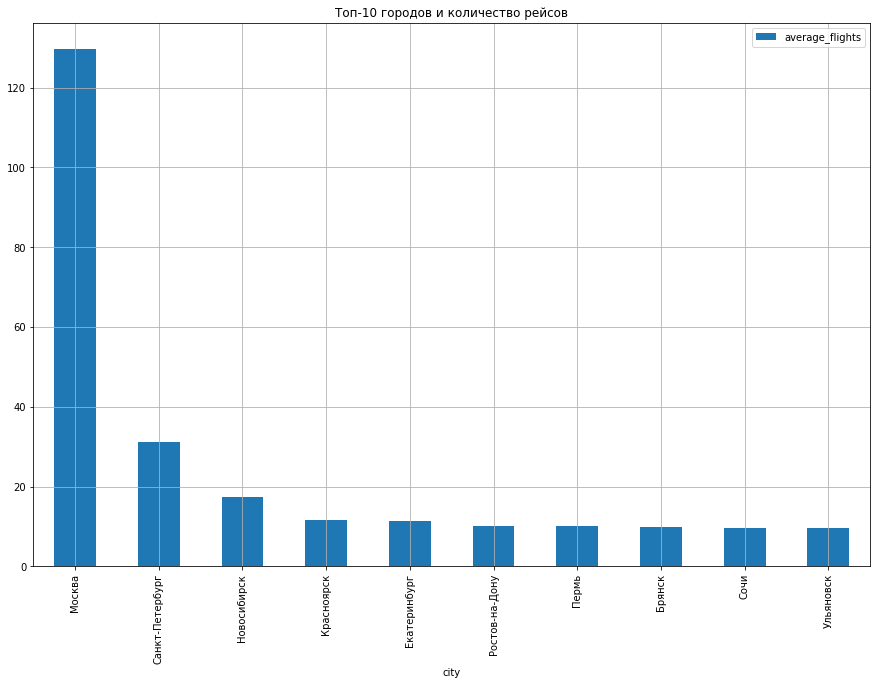

In [44]:
city_10.set_index('city').plot(
    kind='bar', grid=True, figsize=(15, 10), title='Топ-10 городов и количество рейсов')

Построенные графики подтверждают предварительные выводы о содержании данных в таблице city. Москва значительно превосходит другие города по среднему количеству рейсов в день. Также выделяются Санкт-Петербург и Новосибирск. Следом идет равномерное распределение по городам с полетами от 1 до 11 в день.

### Общий вывод

1. Наиболее популярные модели самолетов: Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100;
2. Среди городов по среднему количеству рейсов в день лидирует Москва, также выделяются Санкт-Петербург и Новосибирск.